
# Binary Prediction of Poisonous Mushrooms 
## Supervised Learning - IART 2nd Assignment

The second practical assignment of IART focuses on the application of Supervised Learning techniques in
the context of classification problems. The goal is to develop and evaluate machine learning models capable
of learning from labeled data to make accurate predictions regarding a specific target variable (or concept).

## Data Loading and Preprocessing
In this notebook we will focus on analyzing and balancing the mushroom dataset. The dataset contains information about various mushroom species, including their edibility (poisonous or edible) and various features describing their physical characteristics. 


### 1. Load Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

### 2. Load The Training Data

In [ ]:
# Load the dataset
train_df = pd.read_csv('data/train.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(train_df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1),

In [17]:
# Describe the dataset
print("\nBasic Statistical Summary:")
print(train_df.describe())


Basic Statistical Summary:
                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02


In [18]:
# Check for missing values
print("\nMissing Values:")
missing_values=train_df.isnull().sum()
print(missing_values[missing_values > 0].to_string())


Missing Values:
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45


In [19]:
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
# Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 80]
print(missing_percentage.round(2).to_string())

stem-root            88.45
veil-type            94.88
veil-color           87.94
spore-print-color    91.43


In [20]:
# Determine the balance of the target variable
print("\nTarget Variable Distribution:")
print(train_df['class'].value_counts(normalize=True).to_string())


Target Variable Distribution:
class
p    0.547137
e    0.452863


Here we learn about the dataset and its features. The dataset is a collection of mushroom samples, each with 22 features that describe various characteristics of the mushrooms. The target variable is whether the mushroom is edible or poisonous. The dataset contains 3116945 entries. The features include attributes such as cap shape, cap color, gill attachment, and spore print color. The target variable is binary, indicating whether the mushroom is edible (e) or poisonous (p). The dataset is imbalanced, with a higher number of poisonous mushrooms compared to edible ones. The goal is to build a machine learning model that can accurately classify mushrooms as edible or poisonous based on their features.

### 3. Data Cleaning

This section focuses on cleaning the dataset by removing any unnecessary columns and handling missing values, as well as removing excess rows and balancing the dataset. The dataset is cleaned to ensure that it is suitable for analysis and modeling. The cleaned dataset is then saved to a CSV file for further use. 

#### 3.1 Remove Unnecessary Columns and Fill Missing Values

In [35]:
# Drop rows with missing values in specific columns
clean_df = train_df.dropna(subset=['cap-diameter', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'habitat'])

print("\nMissing Values:")
missing_values=clean_df.isnull().sum()
print(missing_values[missing_values > 0].to_string())
print("\nCleaned DataFrame Shape:", clean_df.shape)


Missing Values:
cap-surface           670948
gill-attachment       523876
gill-spacing         1258317
stem-root            2756822
stem-surface         1980676
veil-type            2957273
veil-color           2740741
ring-type             128850
spore-print-color    2849483

Cleaned DataFrame Shape: (3116717, 22)


In [36]:
# Drop columns with more than 80% missing values
clean_df = clean_df.drop(columns=missing_percentage.index)
print("\nMissing Values:")
missing_values=clean_df.isnull().sum()
print(missing_values[missing_values > 0].to_string())
print("\nCleaned DataFrame Shape:", clean_df.shape)
print("\nCleaned DataFrame Shape after dropping columns with >80% missing values:", clean_df.shape)


Missing Values:
cap-surface         670948
gill-attachment     523876
gill-spacing       1258317
stem-surface       1980676
ring-type           128850

Cleaned DataFrame Shape: (3116717, 18)

Cleaned DataFrame Shape after dropping columns with >80% missing values: (3116717, 18)


In [10]:
# Fill the rest with "unknown"
categorical_cols = clean_df.select_dtypes(include=['object']).columns
clean_df[categorical_cols]  = clean_df[categorical_cols].fillna('unknown')
print("\nMissing Values:")
missing_values=clean_df.isnull().sum()


Missing Values:
id                            0
class                         0
cap-diameter                  0
cap-shape                     0
cap-surface              670948
cap-color                     0
does-bruise-or-bleed          0
gill-attachment          523876
gill-spacing            1258317
gill-color                    0
stem-height                   0
stem-width                    0
stem-surface            1980676
stem-color                    0
has-ring                      0
ring-type                128850
habitat                       0
season                        0

Shape after na drop:  (512065, 18)


#### 3.2 Balancing the Dataset 

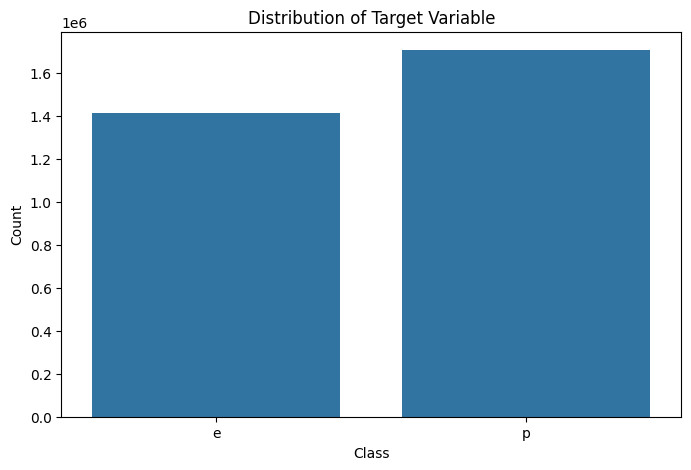

In [24]:
## Data Exploration and Visualization
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=clean_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [26]:
# Separate majority and minority classes
majority_class = clean_df[clean_df['class'] == 'p']
minority_class = clean_df[clean_df['class'] == 'e']

# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)

# Combine minority class with downsampled majority class
balanced_df = pd.concat([minority_class, majority_downsampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset Distribution:")
print(balanced_df['class'].value_counts(normalize=True).to_string())

Balanced Dataset Distribution:
class
p    0.5
e    0.5


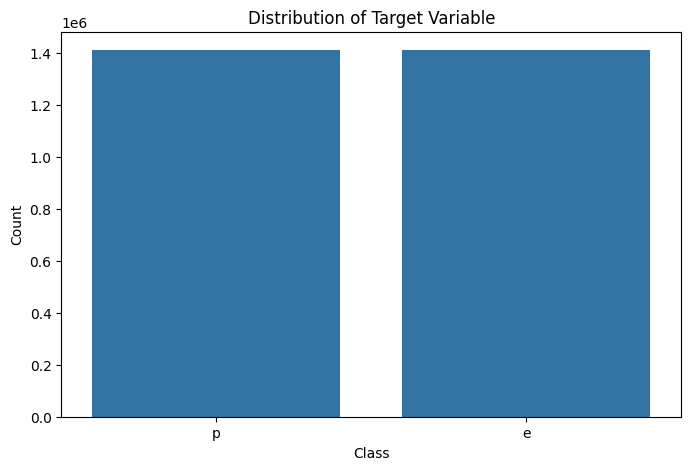

In [27]:
## Data Exploration and Visualization
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=balanced_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Now we have the balanced_df, which is a balanced version of the original dataset. The balancing process ensures that the number of samples for each class (edible and poisonous) is equal, which helps to improve the performance of machine learning models. We will save this balanced dataset to a CSV file for further analysis and modeling. The balanced dataset will be used to train and evaluate machine learning models, allowing us to assess their performance in classifying mushrooms as edible or poisonous. 

In [28]:
balanced_df.to_csv('data/balanced_train.csv', index=False)

## Graphics

<Figure size 2500x2500 with 0 Axes>

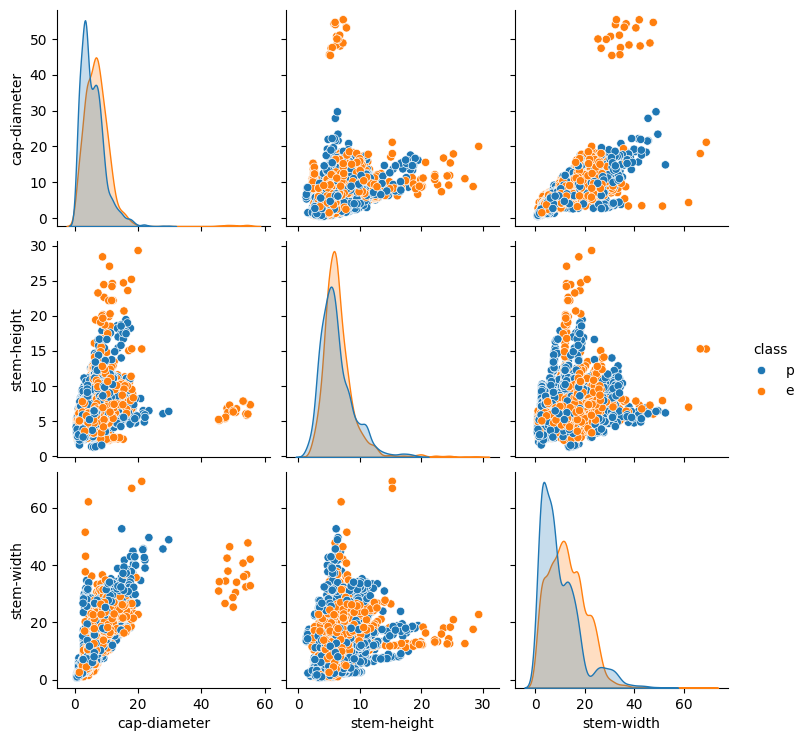

In [85]:
ds = pd.read_csv('data/balanced_train.csv')
ds_test = ds.head(5000)
plt.figure(figsize=(25,25))
sns.pairplot(ds_test.loc[:,'class':], hue='class') #should probably remove more

<Axes: >

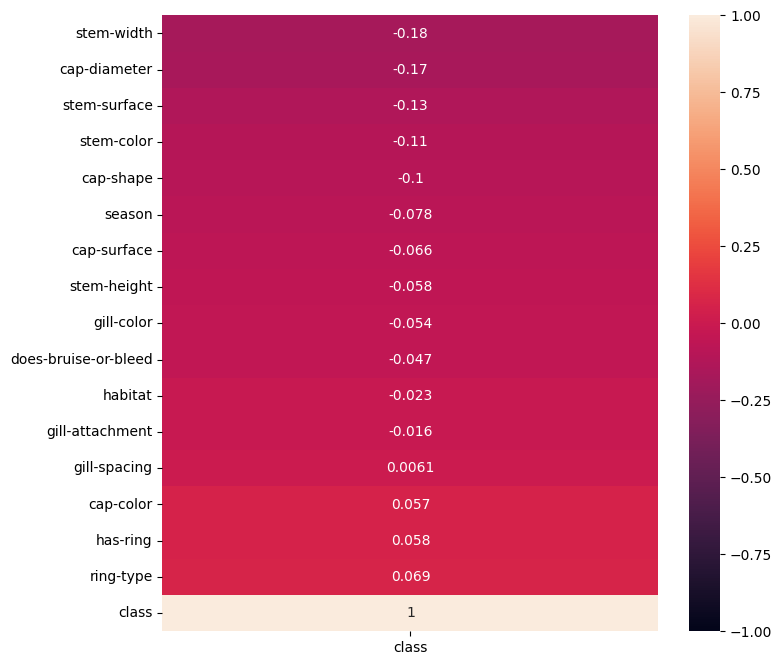

In [84]:
plt.figure(figsize=(8,8))
nonNumericColumns = ds_test.select_dtypes(include=['object']).columns


encoder = LabelEncoder()
dummy_ds_test = ds_test.loc[:,'class':]
for column in nonNumericColumns:
    dummy_ds_test[column]=encoder.fit_transform(dummy_ds_test[column])



correlationGraph = dummy_ds_test.corr()[['class']].sort_values(by='class')

sns.heatmap(correlationGraph,vmin=-1,vmax=1,annot=True)